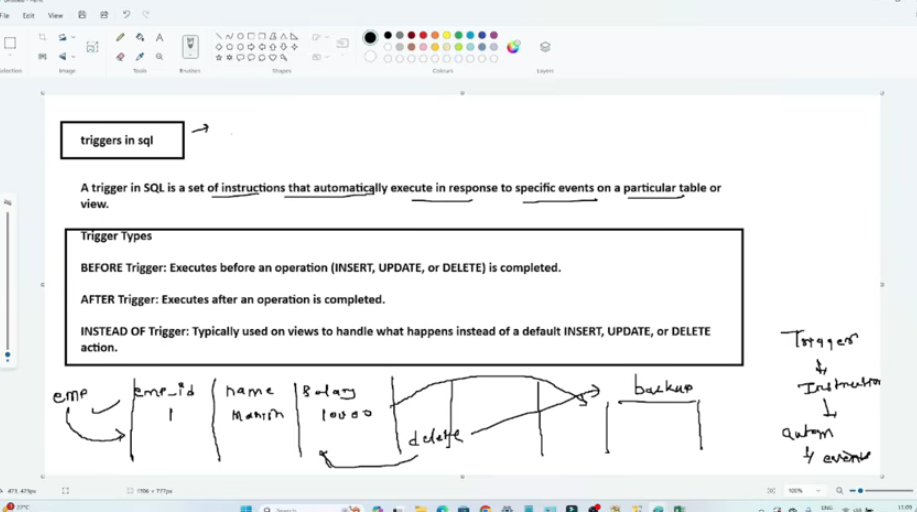

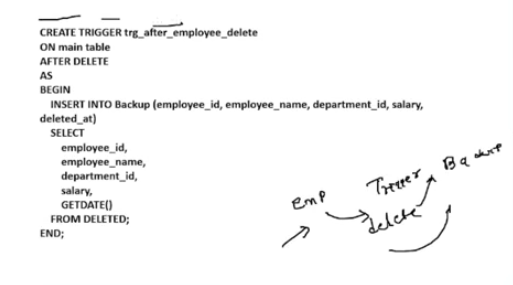

In [ ]:
---- triggers in sql

-- A trigger in SQL is a set of instructions that automatically execute in response to specific events on a particular table or view. Triggers are typically used to enforce business rules, maintain audit trails, and automate tasks such as calculations or updates when changes are made to a database.

--Trigger Types
--BEFORE Trigger: Executes before an operation (INSERT, UPDATE, or DELETE) is completed.
--AFTER Trigger: Executes after an operation is completed.
--INSTEAD OF Trigger: Typically used on views to handle what happens instead of a default INSERT, UPDATE, or DELETE action.


CREATE TABLE Employee (
    employee_id INT PRIMARY KEY,
    employee_name VARCHAR(50),
    department_id INT,
    salary DECIMAL(10, 2)
);


CREATE TABLE Backup_Employee (
    backup_id INT IDENTITY(1,1) PRIMARY KEY,
    employee_id INT,
    employee_name VARCHAR(50),
    department_id INT,
    salary DECIMAL(10, 2),
    deleted_at DATETIME DEFAULT GETDATE()
);



CREATE TRIGGER employee_delete
ON Employee
AFTER DELETE
AS
BEGIN
    INSERT INTO Backup_Employee (employee_id, employee_name, department_id, salary, deleted_at)
    SELECT 
        employee_id, 
        employee_name, 
        department_id, 
        salary, 
        GETDATE() 
    FROM DELETED;
END;





--Testing the Trigger

INSERT INTO Employee(employee_id, employee_name, department_id, salary)
VALUES 
(1, 'Alice', 101, 5000),
(2, 'Bob', 102, 6000),
(3, 'Carol', 101, 5500);

select * from Employee
select * from Backup_Employee


DELETE FROM Employee WHERE employee_id = 3



SELECT * FROM Backup_Employee;

